In [1]:
# data import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly.express as px


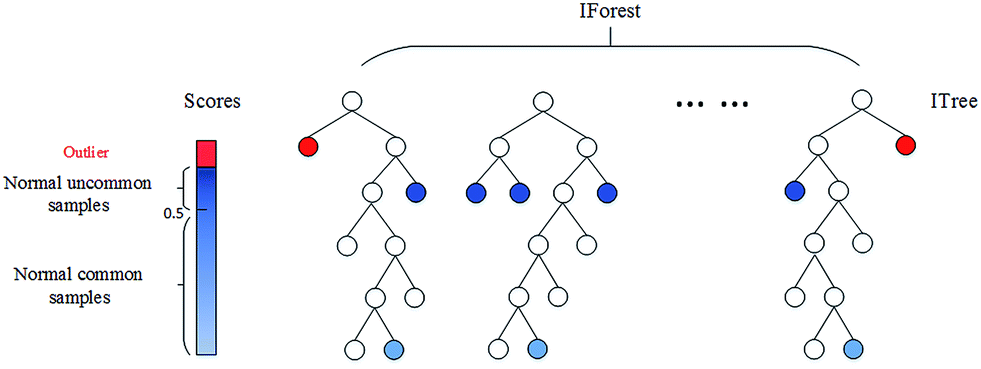

Short Answer
Isolation Forest (iForest) is a machine learning algorithm for anomaly detection. Instances, which have an average shorter path length in the trained isolation forest, are classified as anomalous points.
Long Answer
The isolation Forest algorithm is a very effective and intuitive anomaly detection method, which was first proposed by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in 2008. (F. T. Liu, K. M. Ting, and Z.-H. Zhou. Isolation forest. In Proceedings of the IEEE International Conference on Data Mining, pages 413–422, 2008.)

The philosophy behind iForest is that anomalous data points are few and exotic. That makes them isolated from the normal points.

From a mathematical point of view, recursive partitioning can be represented by a tree structure named Isolation Tree, while the number of partitions required to isolate a point can be interpreted as the length of the path, within the tree, to reach a terminating node starting from the root.


Algorithm
Let \boldsymbol{X} = \{x_1, \ldots, x_n\}X={x 
1
​
 ,…,x 
n
​
 } be a set of dd-dimensional points, and \boldsymbol{X}'X 
′
  is a subsample from \boldsymbol{X}X. An Isolation Tree (iTree) is defined as a data structure with the following properties:

For each node \boldsymbol{T}T in the Tree, \boldsymbol{T}T is either an external-node with no child, or an internal-node with one "test" and exactly two daughter nodes (\boldsymbol{T}_ {l}T 
l
​
  and \boldsymbol{T}_ {r}T 
r
​
 ).
A test at node \boldsymbol{T}T consists of an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p such that the test \boldsymbol{q}<\boldsymbol{p}q<p determines the traversal of a data point to either (\boldsymbol{T}_ {l}T 
l
​
  or \boldsymbol{T}_ {r}T 
r
​
 ).
In order to build an iTree, the algorithm recursively divides \boldsymbol{X}'X 
′
  by randomly selecting an attribute \boldsymbol{q}q and a split value \boldsymbol{p}p, until either

In [3]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="PHKTKYAZsXz4FtVvo8lUpMJv3",
    project_name="fraudes-grandes-clientes",
    workspace="napo1998delsur",
)

# Run your code and go to /

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/napo1998delsur/voltaje200/215fe6de18c248b4a81f9bbff932e583
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (2.13 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/napo1998delsur/fraudes-grandes-clientes/40772d3785264304ad333add8aef35

In [4]:
Experiment(log_code=True, api_key="PHKTKYAZsXz4FtVvo8lUpMJv3")

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/napo1998delsur/fraudes-grandes-clientes/40772d3785264304ad333add8aef3545
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (2.13 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/napo1998delsur/general/786417d4bfd94d6a884c7abd1bf093cc


In [5]:
# clase de inicio de operaciones

class ExNode:
    def __init__(self,size):
        self.size=size
        
class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

In [2]:
suministrosindustriales=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\suministrosindustriales.csv')

In [3]:
suministrosindustriales.head()

,N°,Zona,Un.lect.,Contrato,Tp.tarifa,Instalacion,Fact.cálculo,Equipo,Número de serie,Fabricante,...,11/01/2022,Prioridad,Promedio,% Variacion,Tendencia,Grafico,Ordenes,Observacion,Prediccion,Prediccion_map
0,1131,ST,ST_78_03,504832401.0,G_GMH,30323809.0,160.0,1.000000e+11,115316.0,SIEMENS,...,21680.0,Media,"16,481",101.38%,-,NaN,NaN,NaN,1.0,Sin Anomalia
1,947,ST,ST_78_14,207043801.0,G_GMH,30104871.0,60.0,1.000000e+11,202.0,SCHLUMBERGER,...,0.0,Baja,"5,245",199.64%,-,NaN,NaN,NaN,1.0,Sin Anomalia
2,1167,ST,ST_78_13,515750101.0,G_GMH,30369130.0,160.0,1.000000e+11,182971.0,LANDIS + GYR,...,336.0,Media,"20,403",82.15%,-,NaN,NaN,NaN,1.0,Sin Anomalia
3,602,SS,SS_07_06,101263601.0,G_GMH,30035303.0,120.0,1.000000e+11,479287.0,SIEMENS,...,5904.0,Baja,"4,346",42.12%,-,NaN,NaN,NaN,1.0,Sin Anomalia
4,484,SS,SS_78_11,502594901.0,G_GMH,30206065.0,120.0,1.000000e+11,106418.0,SIEMENS,...,44280.0,Alta,"51,534",13.82%,-,NaN,NaN,NaN,1.0,Sin Anomalia


In [4]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [5]:
suministrosindustriales.shape

(1698, 74)

array([[<AxesSubplot: title={'center': 'Contrato'}>,
        <AxesSubplot: title={'center': 'Instalacion'}>,
        <AxesSubplot: title={'center': 'Fact.cálculo'}>,
        <AxesSubplot: title={'center': 'Equipo'}>,
        <AxesSubplot: title={'center': 'Número de serie'}>,
        <AxesSubplot: title={'center': '01/01/2019'}>,
        <AxesSubplot: title={'center': '02/01/2019'}>],
       [<AxesSubplot: title={'center': '03/01/2019'}>,
        <AxesSubplot: title={'center': '04/01/2019'}>,
        <AxesSubplot: title={'center': '05/01/2019'}>,
        <AxesSubplot: title={'center': '06/01/2019'}>,
        <AxesSubplot: title={'center': '07/01/2019'}>,
        <AxesSubplot: title={'center': '08/01/2019'}>,
        <AxesSubplot: title={'center': '09/01/2019'}>],
       [<AxesSubplot: title={'center': '10/01/2019'}>,
        <AxesSubplot: title={'center': '11/01/2019'}>,
        <AxesSubplot: title={'center': '12/01/2019'}>,
        <AxesSubplot: title={'center': '01/01/2020'}>,
      

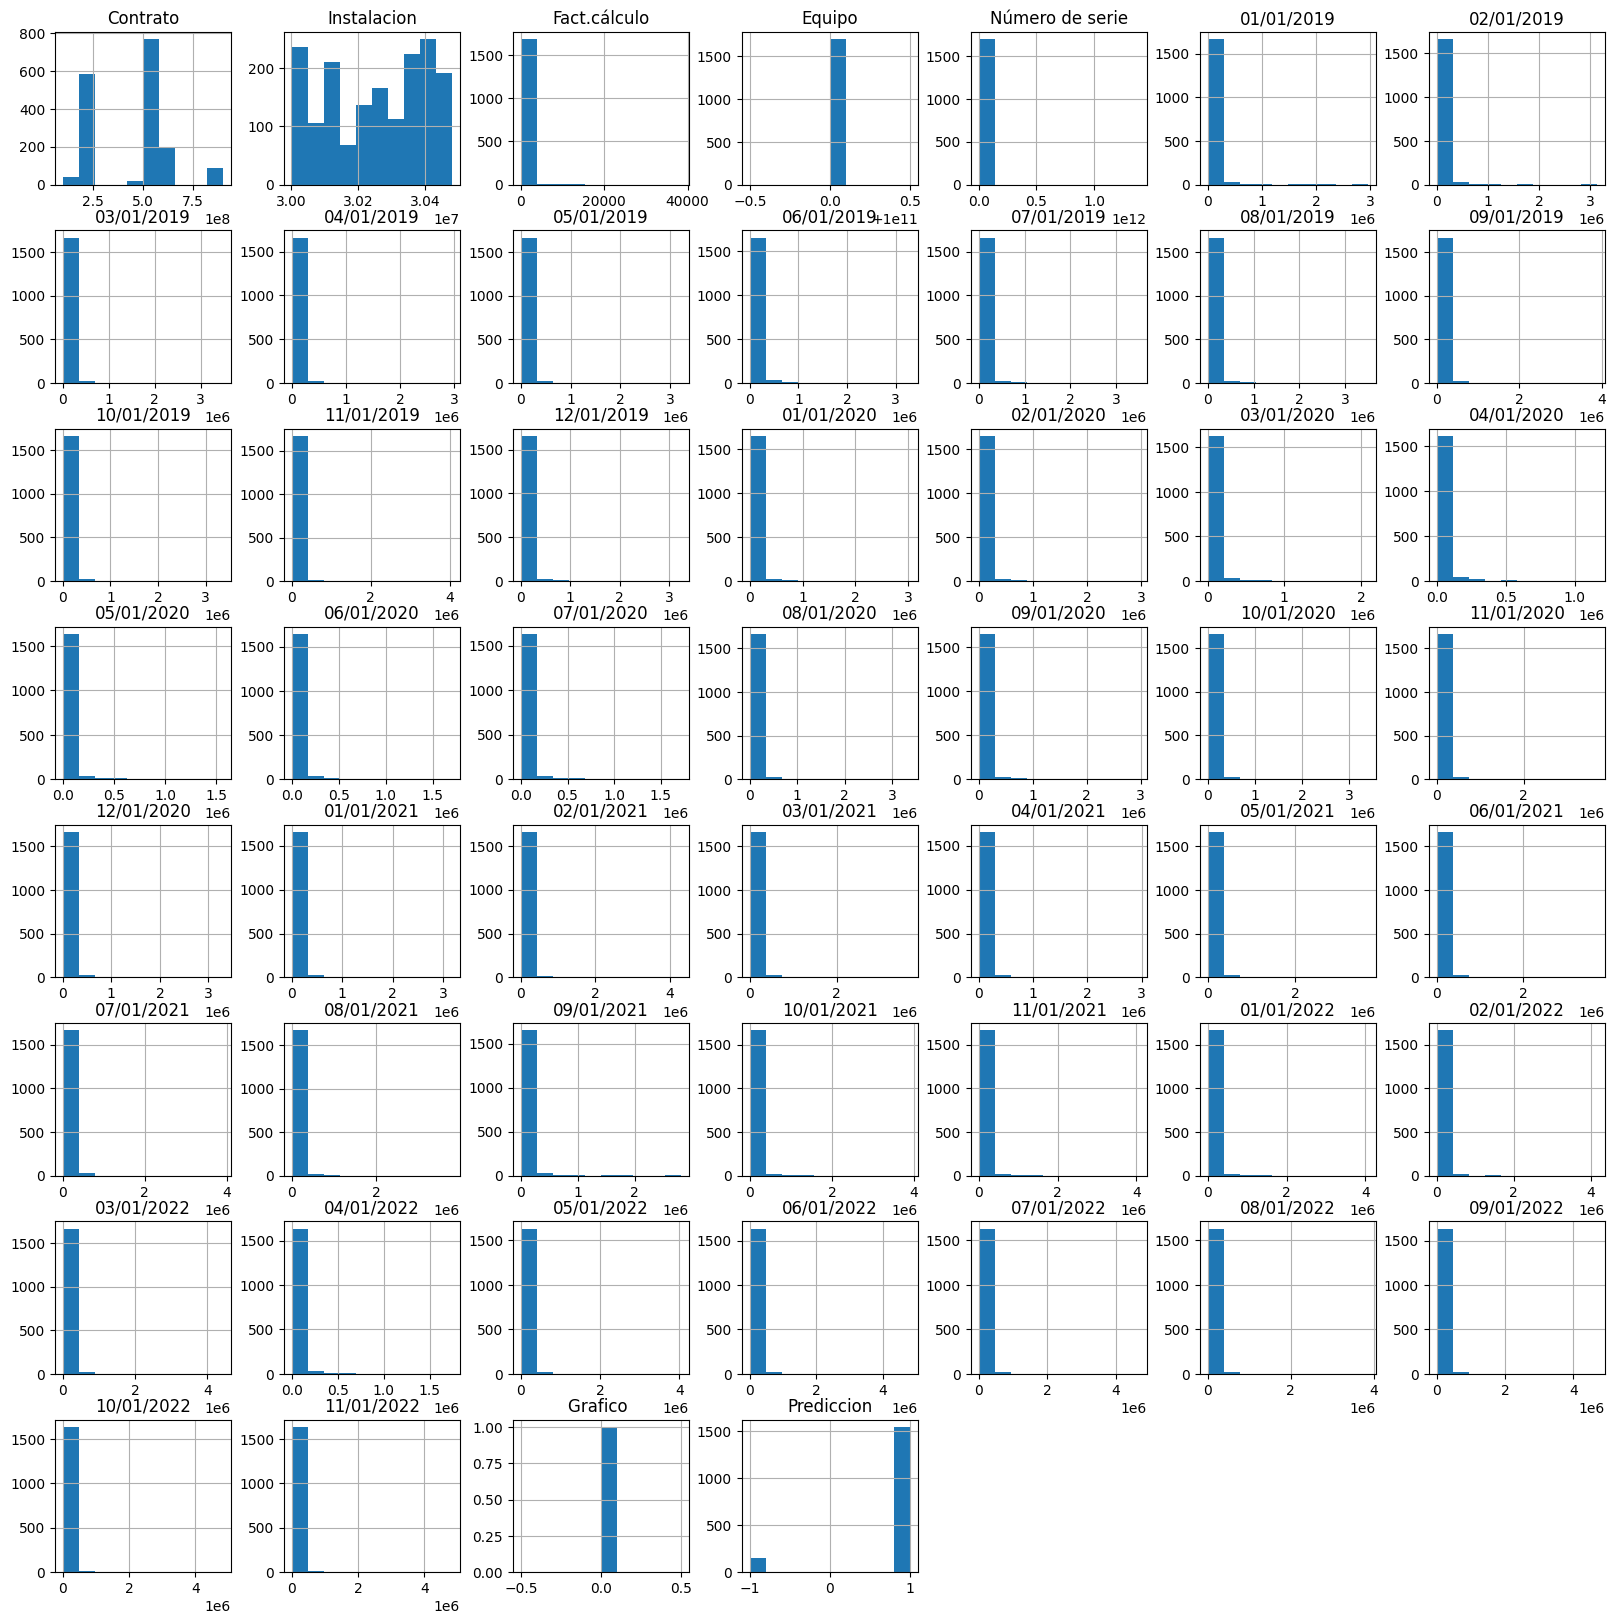

In [6]:
suministrosindustriales.hist(figsize=(20,20))

In [7]:
suministrosindustriales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N°                 1698 non-null   object 
 1   Zona               1697 non-null   object 
 2   Un.lect.           1697 non-null   object 
 3   Contrato           1697 non-null   float64
 4   Tp.tarifa          1697 non-null   object 
 5   Instalacion        1697 non-null   float64
 6   Fact.cálculo       1697 non-null   float64
 7   Equipo             1697 non-null   float64
 8   Número de serie    1697 non-null   float64
 9   Fabricante         1697 non-null   object 
 10  Denomin.tipo       1697 non-null   object 
 11  DS                 1681 non-null   object 
 12  ¿Telesgestionada?  1697 non-null   object 
 13  Tipo de medicion   1697 non-null   object 
 14  Lista              1697 non-null   object 
 15  Municipio          1697 non-null   object 
 16  Población          1697 

,variable_1,variable_2,r,abs_r
2547,11/01/2022,10/01/2022,1.000000,1.000000
2497,10/01/2022,11/01/2022,1.000000,1.000000
2131,03/01/2022,02/01/2022,0.996219,0.996219
2081,02/01/2022,03/01/2022,0.996219,0.996219
2495,10/01/2022,09/01/2022,0.995733,0.995733
...,...,...,...,...
1558,03/01/2021,01/01/2021,0.983033,0.983033
1554,03/01/2021,09/01/2020,0.982919,0.982919
1254,09/01/2020,03/01/2021,0.982919,0.982919
2389,08/01/2022,05/01/2022,0.982895,0.982895


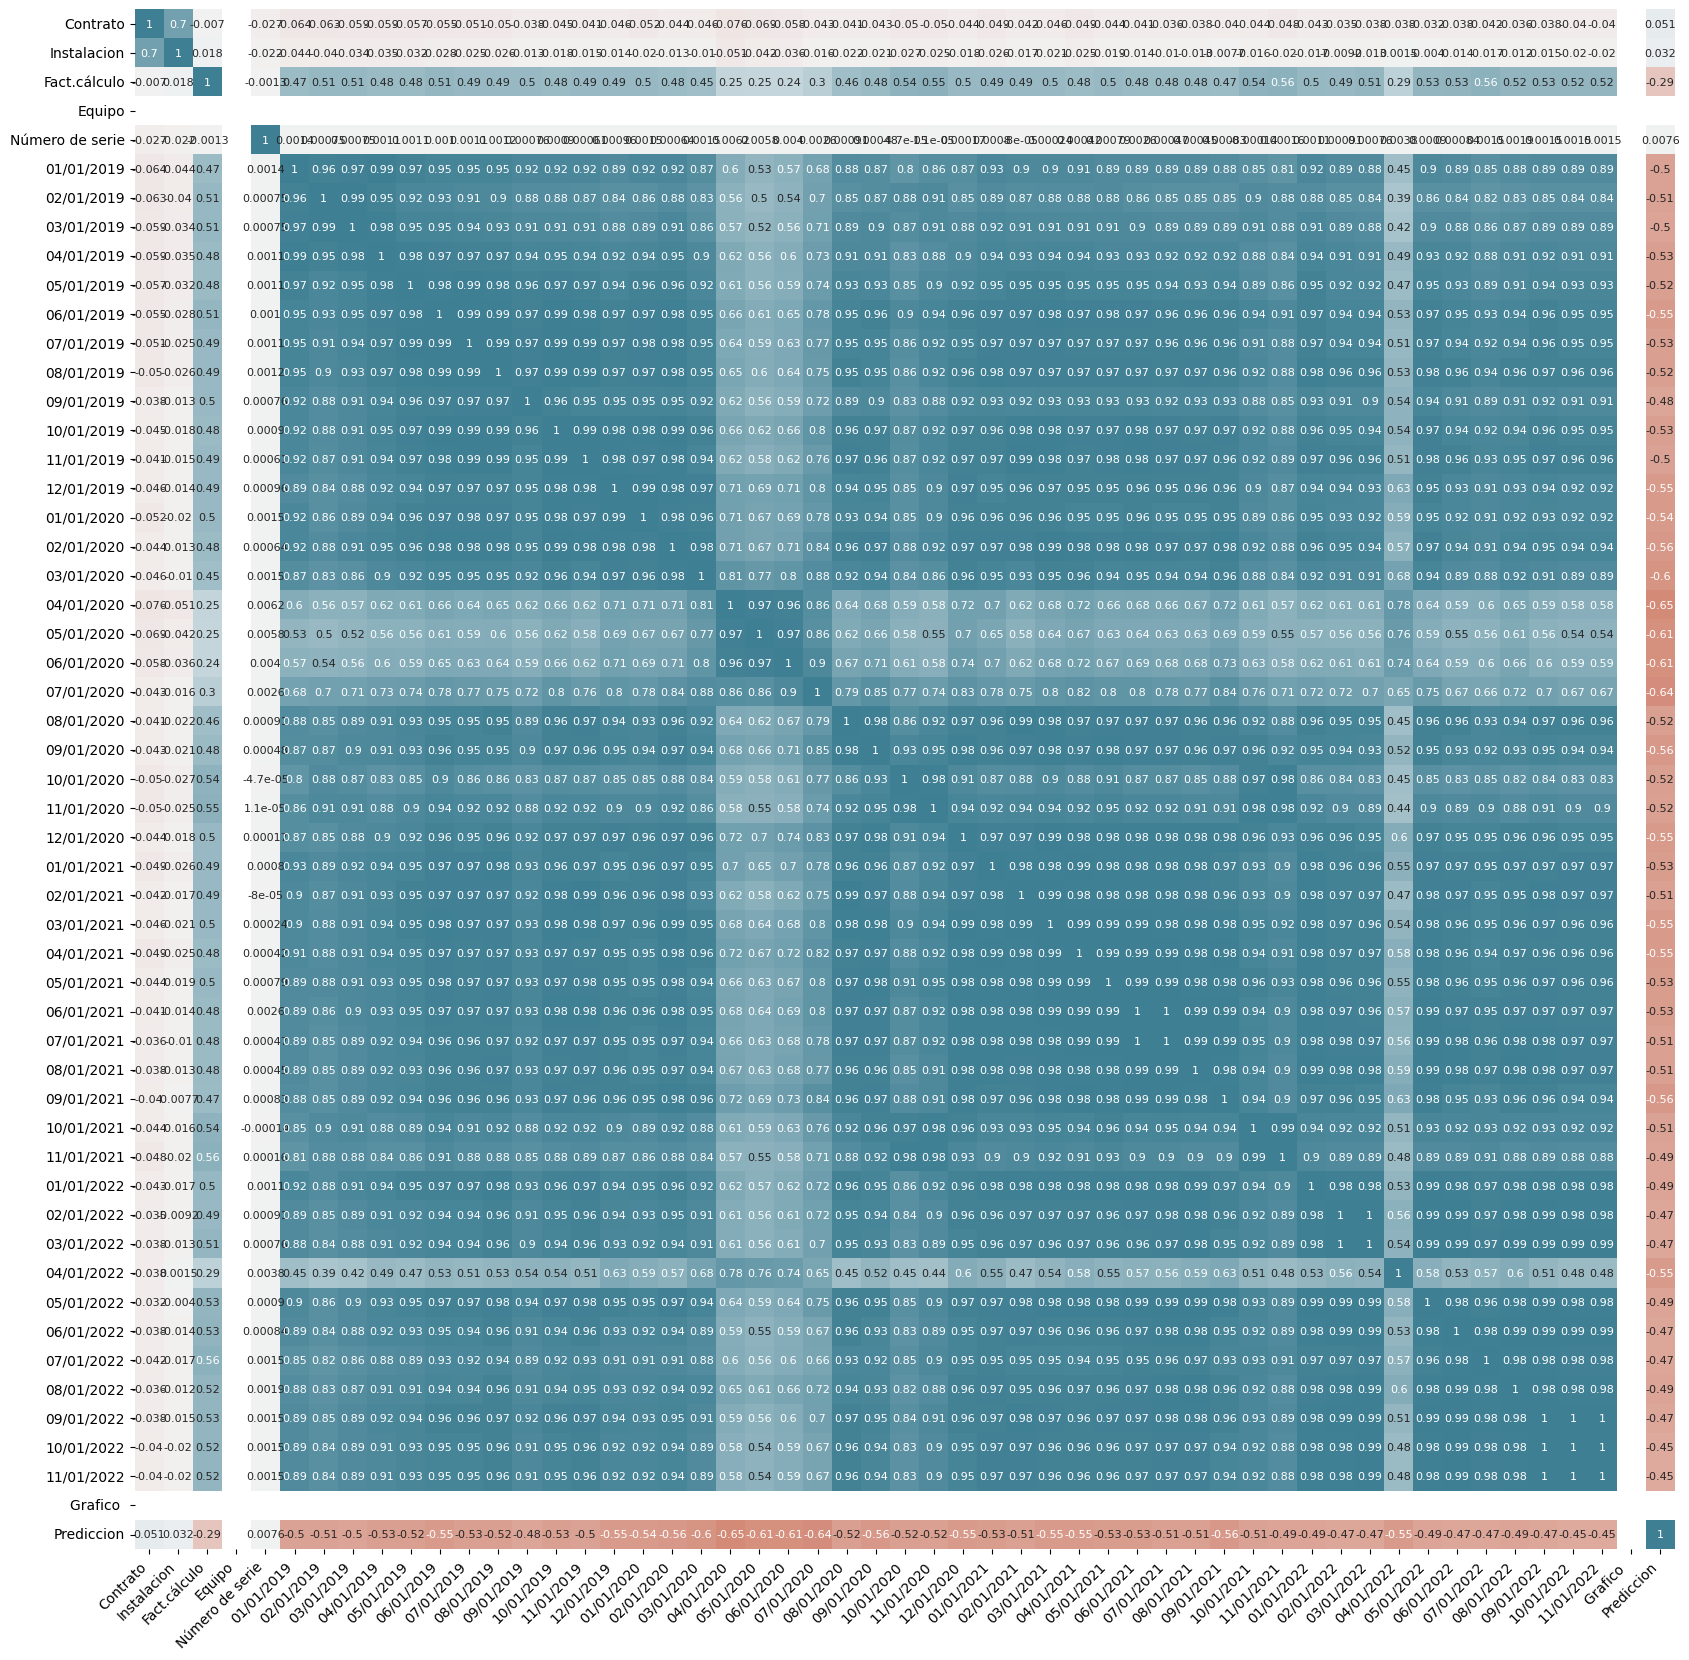

In [8]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = suministrosindustriales.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

In [9]:
suministrosindustriales.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N°,1698,1698,1131,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zona,1697,8,ST,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Un.lect.,1697,321,ST_78_03,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contrato,1697.0,NaN,NaN,NaN,426838188.823807,194853970.758459,100493801.0,207054501.0,506734701.0,517189701.0,901112200.0
Tp.tarifa,1697,13,G_GMH,850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Grafico,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
Ordenes,1,1,"falla,",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Observacion,10,8,Campaña 2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion,1697.0,NaN,NaN,NaN,0.818503,0.574671,-1.0,1.0,1.0,1.0,1.0


In [10]:
suministrosindustriales.isnull().sum()

N°                   0
Zona                 1
Un.lect.             1
Contrato             1
Tp.tarifa            1
                  ... 
Grafico           1697
Ordenes           1697
Observacion       1688
Prediccion           1
Prediccion_map       1
Length: 74, dtype: int64

In [11]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [12]:
suministrosindustriales.isnull().sum()

N°                   0
Zona                 1
Un.lect.             1
Contrato             1
Tp.tarifa            1
                  ... 
Grafico           1697
Ordenes           1697
Observacion       1688
Prediccion           1
Prediccion_map       1
Length: 74, dtype: int64

In [13]:
suministrosindustriales.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [14]:

fig = px.bar(suministrosindustriales, x="Zona", y="Promedio", color="Prioridad", barmode="group")
fig.show()

In [15]:

fig = px.bar(suministrosindustriales, x="Tendencia ", y="Promedio", color="Prioridad", barmode="group")
fig.show()

In [16]:
suministrosindustriales.isnull().sum()

N°                   0
Zona                 1
Un.lect.             1
Contrato             1
Tp.tarifa            1
                  ... 
Grafico           1697
Ordenes           1697
Observacion       1688
Prediccion           1
Prediccion_map       1
Length: 74, dtype: int64

In [17]:
clean=suministrosindustriales.fillna(0)

# modelo 1


In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [19]:
X=clean[['01/01/2019','02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019' ]]

In [21]:

X_train, X_test =\
       train_test_split(X, 
                        test_size=0.2, 
                        random_state=1,
                        )

In [22]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=6)
clf.fit_predict(X)
clf.negative_outlier_factor_

array([-1.58158041, -2.10116987, -2.83843132, ..., -1.        ,
       -1.12153458, -1.        ])

In [26]:
test=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\test.csv')

In [27]:
test.isnull().sum()

01/01/2019     0
02/01/2019     0
03/01/2019     0
04/01/2019     0
05/01/2019     0
06/01/2019     0
07/01/2019     0
08/01/2019     0
09/01/2019     0
10/01/2019     0
11/01/2019     0
12/01/2019     0
01/01/2020     0
02/01/2020     0
03/01/2020     0
04/01/2020     0
05/01/2020     0
06/01/2020     0
07/01/2020     0
08/01/2020     0
09/01/2020     0
10/01/2020     0
11/01/2020     0
12/01/2020     0
01/01/2021     7
02/01/2021    11
03/01/2021     0
04/01/2021     0
05/01/2021     0
06/01/2021     0
07/01/2021     0
08/01/2021     0
09/01/2021     0
10/01/2021     0
11/01/2021     7
01/01/2022     7
02/01/2022     7
03/01/2022     7
04/01/2022     7
05/01/2022    38
06/01/2022    38
07/01/2022    38
08/01/2022    38
09/01/2022    38
10/01/2022    38
11/01/2022    38
dtype: int64

In [28]:
df=test.fillna(0)

In [29]:
df.isnull().sum()

01/01/2019    0
02/01/2019    0
03/01/2019    0
04/01/2019    0
05/01/2019    0
06/01/2019    0
07/01/2019    0
08/01/2019    0
09/01/2019    0
10/01/2019    0
11/01/2019    0
12/01/2019    0
01/01/2020    0
02/01/2020    0
03/01/2020    0
04/01/2020    0
05/01/2020    0
06/01/2020    0
07/01/2020    0
08/01/2020    0
09/01/2020    0
10/01/2020    0
11/01/2020    0
12/01/2020    0
01/01/2021    0
02/01/2021    0
03/01/2021    0
04/01/2021    0
05/01/2021    0
06/01/2021    0
07/01/2021    0
08/01/2021    0
09/01/2021    0
10/01/2021    0
11/01/2021    0
01/01/2022    0
02/01/2022    0
03/01/2022    0
04/01/2022    0
05/01/2022    0
06/01/2022    0
07/01/2022    0
08/01/2022    0
09/01/2022    0
10/01/2022    0
11/01/2022    0
dtype: int64

In [30]:
y=clf.predict(df)

In [31]:
X_train.head()

,01/01/2019,02/01/2019,03/01/2019,04/01/2019,05/01/2019,06/01/2019,07/01/2019,08/01/2019,09/01/2019,10/01/2019,...,02/01/2022,03/01/2022,04/01/2022,05/01/2022,06/01/2022,07/01/2022,08/01/2022,09/01/2022,10/01/2022,11/01/2022
724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,18840.0,21024.0,21696.0,20232.0,19776.0,21816.0,22320.0,21504.0,22800.0,21408.0,...,18024.0,17832.0,16368.0,17496.0,16296.0,17592.0,17472.0,16200.0,15048.0,15048.0
681,3384.0,3480.0,3360.0,3384.0,3936.0,4224.0,4224.0,3912.0,3768.0,4728.0,...,6408.0,6576.0,6552.0,6936.0,6024.0,4440.0,8472.0,5880.0,5664.0,5664.0
593,6756.0,9756.0,10092.0,10596.0,8172.0,5172.0,5508.0,4908.0,5484.0,5148.0,...,9228.0,10848.0,11796.0,9912.0,11196.0,10200.0,8796.0,10608.0,10680.0,10680.0
690,6042.0,6570.0,7254.0,7014.0,6576.0,6852.0,7632.0,7170.0,7284.0,6678.0,...,6798.0,7350.0,6876.0,6756.0,6618.0,7434.0,7896.0,7038.0,7224.0,7224.0


In [32]:
Y_pred=clf.predict(X_test)

In [33]:
Y_pred2=clf.predict(X_train)

In [34]:
pred_df = pd.DataFrame(y,columns=["Prediccion"])
pred_df.to_csv('outputsgrandesclientes.csv', header=True, index_label='Id')

In [35]:
pred_df.head()

,Prediccion
0,1
1,1
2,1
3,1
4,1


In [36]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [37]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [38]:
print(pred_df['Prediccion'].unique())

[ 1 -1]


In [39]:
prediccion={
    1:'Sin Anomalia',
    -1:'Anomalia'
}
pred_df['Prediccion_map']=pred_df['Prediccion'].map(prediccion)

In [40]:
pred_df.head()

,Prediccion,Prediccion_map
0,1,Sin Anomalia
1,1,Sin Anomalia
2,1,Sin Anomalia
3,1,Sin Anomalia
4,1,Sin Anomalia


In [41]:
print(pred_df['Prediccion_map'].unique())

['Sin Anomalia' 'Anomalia']


In [42]:
salida=pred_df.to_csv('salida.csv')

In [43]:
pred_df.head()

,Prediccion,Prediccion_map
0,1,Sin Anomalia
1,1,Sin Anomalia
2,1,Sin Anomalia
3,1,Sin Anomalia
4,1,Sin Anomalia


In [44]:
datos=pd.read_csv(r'C:\Users\nperez\Documents\GitHub\fraudes_grandes_clientes\data\suministrosindustriales.csv')

In [45]:
datos.head()

,N°,Zona,Un.lect.,Contrato,Tp.tarifa,Instalacion,Fact.cálculo,Equipo,Número de serie,Fabricante,...,11/01/2022,Prioridad,Promedio,% Variacion,Tendencia,Grafico,Ordenes,Observacion,Prediccion,Prediccion_map
0,1131,ST,ST_78_03,504832401.0,G_GMH,30323809.0,160.0,1.000000e+11,115316.0,SIEMENS,...,21680.0,Media,"16,481",101.38%,-,NaN,NaN,NaN,1.0,Sin Anomalia
1,947,ST,ST_78_14,207043801.0,G_GMH,30104871.0,60.0,1.000000e+11,202.0,SCHLUMBERGER,...,0.0,Baja,"5,245",199.64%,-,NaN,NaN,NaN,1.0,Sin Anomalia
2,1167,ST,ST_78_13,515750101.0,G_GMH,30369130.0,160.0,1.000000e+11,182971.0,LANDIS + GYR,...,336.0,Media,"20,403",82.15%,-,NaN,NaN,NaN,1.0,Sin Anomalia
3,602,SS,SS_07_06,101263601.0,G_GMH,30035303.0,120.0,1.000000e+11,479287.0,SIEMENS,...,5904.0,Baja,"4,346",42.12%,-,NaN,NaN,NaN,1.0,Sin Anomalia
4,484,SS,SS_78_11,502594901.0,G_GMH,30206065.0,120.0,1.000000e+11,106418.0,SIEMENS,...,44280.0,Alta,"51,534",13.82%,-,NaN,NaN,NaN,1.0,Sin Anomalia


In [46]:
datos.columns

Index(['N°', 'Zona', 'Un.lect.', 'Contrato', 'Tp.tarifa', 'Instalacion',
       'Fact.cálculo', 'Equipo', 'Número de serie', 'Fabricante',
       'Denomin.tipo', 'DS', '¿Telesgestionada?', 'Tipo de medicion', 'Lista',
       'Municipio', 'Población', 'Distrito', 'Calle', '01/01/2019',
       '02/01/2019', '03/01/2019', '04/01/2019', '05/01/2019', '06/01/2019',
       '07/01/2019', '08/01/2019', '09/01/2019', '10/01/2019', '11/01/2019',
       '12/01/2019', '01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020',
       '05/01/2020', '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020',
       '10/01/2020', '11/01/2020', '12/01/2020', '01/01/2021', '02/01/2021',
       '03/01/2021', '04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021',
       '08/01/2021', '09/01/2021', '10/01/2021', '11/01/2021', '01/01/2022',
       '02/01/2022', '03/01/2022', '04/01/2022', '05/01/2022', '06/01/2022',
       '07/01/2022', '08/01/2022', '09/01/2022', '10/01/2022', '11/01/2022',
       'Prioridad', '

In [47]:
px.scatter(datos,x='N°',y='Prediccion',color='Prediccion_map')